In [2]:
import pprint

# Data libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Classifiers 
from sklearn.ensemble import RandomForestClassifier

# Analysis libs
from sklearn import tree
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [3]:
malware_data_filepath = '../datasets/Obfuscated/Obfuscated-MalMem2022_edited.csv'
malware_data = pd.read_csv(malware_data_filepath)

In [4]:
X_drop_columns = ['Class', 'Category', 'svcscan.interactive_process_services', 'handles.nport', 'pslist.nprocs64bit', 'callbacks.ngeneric']
X = malware_data.drop(columns=X_drop_columns)

y_column = malware_data.Category
class_le = LabelEncoder()
y = class_le.fit_transform(y_column)
y_column.value_counts()

Category
Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64

In [5]:
X

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,handles.nevent,...,psxview.not_in_deskthrd_false_avg,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous
0,45,17,10.555556,202.844444,1694,38.500000,9129,212.302326,670,3161,...,0.191489,138,389,221,26,24,116,121,87,0
1,47,19,11.531915,242.234043,2074,44.127660,11385,242.234043,840,3761,...,0.127660,138,392,222,26,24,118,122,87,0
2,40,14,14.725000,288.225000,1932,48.300000,11529,288.225000,1050,3996,...,0.125000,137,395,222,26,27,118,120,88,0
3,32,13,13.500000,264.281250,1445,45.156250,8457,264.281250,630,2961,...,0.187500,138,395,222,26,27,118,120,88,0
4,42,16,11.452381,281.333333,2067,49.214286,11816,281.333333,908,3834,...,0.217391,138,392,222,26,24,118,124,87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,215.486487,1453,39.270270,7973,215.486487,630,2819,...,0.184211,138,389,221,26,24,116,120,86,0
58592,37,14,9.945946,190.216216,1347,36.405405,7038,190.216216,603,2394,...,0.162162,138,389,221,26,24,116,116,88,0
58593,38,15,9.842105,210.026316,1448,38.105263,7982,215.729730,624,2816,...,0.225000,138,389,221,26,24,116,120,88,0
58594,37,15,10.243243,215.513513,1452,39.243243,7974,215.513513,632,2819,...,0.162162,138,389,221,26,24,116,120,87,0


In [6]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (41017, 51)
y_train shape: (41017,)
X_test shape: (17579, 51)
y_test shape: (17579,)


In [33]:
rf = RandomForestClassifier(n_estimators=150, random_state=42, max_features=20, max_depth=25, min_samples_leaf=2)
# rf = RandomForestClassifier(n_estimators=X.shape[1], random_state=42)
clf = rf.fit(X_train,y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 0.9672087183362996
Test accuracy: 0.876955458217191


In [ ]:
# rf = RandomForestClassifier(n_estimators=X.shape[1], random_state=42)
# Training accuracy: 0.9997318185142746
# Test accuracy: 0.8721201433528643

# rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=15, max_depth=10, min_samples_leaf=4)
# Training accuracy: 0.8424799473389083
# Test accuracy: 0.8286591956311508

# rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=15, max_depth=15, min_samples_leaf=4)
# Training accuracy: 0.9094521783650682
# Test accuracy: 0.8617099948802549

# rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=15, max_depth=15, min_samples_leaf=2)
# Training accuracy: 0.9205939000902065
# Test accuracy: 0.864326753512714

# rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features=20, max_depth=15, min_samples_leaf=2)
# Training accuracy: 0.9232757149474609
# Test accuracy: 0.865692018886171

# rf = RandomForestClassifier(n_estimators=150, random_state=42, max_features=20, max_depth=20, min_samples_leaf=2)
# Training accuracy: 0.9699880537338177
# Test accuracy: 0.8768985721599636

# best one here
# rf = RandomForestClassifier(n_estimators=150, random_state=42, max_features=20, max_depth=25, min_samples_leaf=2)
# Training accuracy: 0.9848111758539142
# Test accuracy: 0.8784913817623301



In [25]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[8790,    0,    0,    0],
       [   0, 2128,  394,  415],
       [   0,  308, 2369,  329],
       [   0,  510,  292, 2044]])

In [26]:
clf.classes_

array([0, 1, 2, 3])

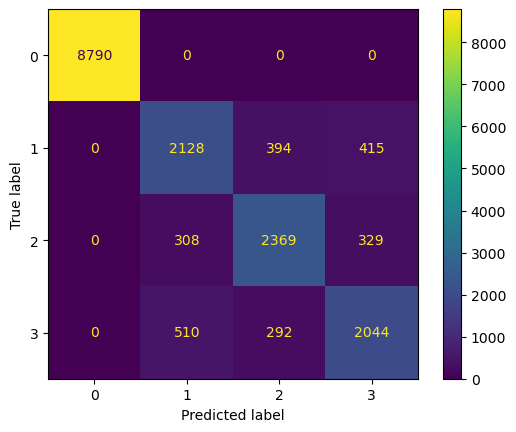

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [39]:
misclassified = np.where(y_test != y_pred)
print(len(misclassified[0]))

2242


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8790
           1       0.73      0.72      0.72      2937
           2       0.78      0.79      0.78      3006
           3       0.73      0.72      0.73      2846

    accuracy                           0.87     17579
   macro avg       0.81      0.81      0.81     17579
weighted avg       0.87      0.87      0.87     17579



### results
We can see that the model does not seem to do as well in multi-classification in compareison to binary. The accuracy is as low as 87%, but this is still relatively great. When if classifies the other classes like Ransomware, Spyware, and Trojan our precision, recall, and f1-scores are in the 70's. Even with the unnecessary features removed we still get the same outcome, which should not be surprising.  